In [4]:
import requests

# Amazon URL
amazon_url = "https://www.amazon.in/s?k=mobile+phones"

# Flipkart URL
flipkart_url = "https://www.flipkart.com/search?q=mobile+phones"

# Send HTTP request to Amazon
amazon_response = requests.get(amazon_url)

# Send HTTP request to Flipkart
flipkart_response = requests.get(flipkart_url)


In [5]:
from bs4 import BeautifulSoup

# Parse Amazon HTML content
amazon_soup = BeautifulSoup(amazon_response.content, 'html.parser')

# Parse Flipkart HTML content
flipkart_soup = BeautifulSoup(flipkart_response.content, 'html.parser')

In [8]:
# Extract Amazon product information
amazon_products = amazon_soup.find_all('div', {'class': 's-result-item'})

for product in amazon_products:
    title = product.find('span', {'class': 'a-text-normal'}).text.strip()
    price = product.find('span', {'class': 'a-price-whole'}).text.strip()
    rating = product.find('span', {'class': 'a-icon-alt'}).text.strip()
    reviews = product.find('span', {'class': 'a-size-small'}).text.strip()
    print(f"Title: {title}, Price: {price}, Rating: {rating}, Reviews: {reviews}")

# Extract Flipkart product information
flipkart_products = flipkart_soup.find_all('div', {'class': '_1AtVbE'})

for product in flipkart_products:
    title = product.find('a', {'class': 'IRpwTa'}).text.strip()
    price = product.find('div', {'class': '_30jeq3'}).text.strip()
    rating = product.find('div', {'class': '_2v5EAkh'}).text.strip()
    reviews = product.find('span', {'class': '_2_R_DZ'}).text.strip()
    print(f"Title: {title}, Price: {price}, Rating: {rating}, Reviews: {reviews}")
    
    


In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    "User-Agent": "Your User-Agent here"
}

# Store collected data in a list of dictionaries
collected_data = []

def search_amazon(name):
    try:
        name1 = name.replace(" ", "-")
        name2 = name.replace(" ", "+")
        url = f'https://www.amazon.in/{name1}/s?k={name2}'
        res = requests.get(url, headers=headers)
        print("\nSearching in Amazon...")
        soup = BeautifulSoup(res.text, 'html.parser')
        amazon_page = soup.select('.a-color-base.a-text-normal')
        
        if amazon_page:
            amazon_name = amazon_page[0].getText().strip()
            amazon_price = soup.select('.a-price-whole')[0].getText().strip().upper()
        else:
            amazon_name = "No product found!"
            amazon_price = '0'

        print("Amazon:")
        print(amazon_name)
        print(f"₹{amazon_price}")
        print("---------------------------------")
        
        return amazon_name, amazon_price
    except Exception as e:
        print(f"Amazon: Error occurred! {e}")
        print("---------------------------------")
        return "No product found!", '0'

def search_walmart(name):
    try:
        name1 = name.replace(" ", "+")
        url = f'https://www.walmart.com/search?q={name1}'
        res = requests.get(url, headers=headers)
        print("\nSearching in Walmart...")
        soup = BeautifulSoup(res.text, 'html.parser')
        walmart_page = soup.select('.product-title')
        
        if walmart_page:
            walmart_name = walmart_page[0].getText().strip()
            walmart_price = soup.select('.price-characteristic')[0].getText().strip()
        else:
            walmart_name = "No product found!"
            walmart_price = '0'

        print("Walmart:")
        print(walmart_name)
        print(walmart_price)
        print("---------------------------------")
        
        return walmart_name, walmart_price
    except Exception as e:
        print(f"Walmart: Error occurred! {e}")
        print("---------------------------------")
        return "No product found!", '0'
def convert(price):
    return int(price.replace("₹", "").replace(",", "").strip()) if price != '0' else 0

# Take dynamic input for product names
product_list = input("Enter product names separated by commas: ").split(',')

for product_name in product_list:
    product_name = product_name.strip()
    amazon_name, amazon_price = search_amazon(product_name)
    walmart_name, walmart_price = search_walmart(product_name)

    # Convert prices to integers
    amazon_price = convert(amazon_price)
    walmart_price = convert(walmart_price)

    # Add collected data to the list
    collected_data.append({
        "Product Name": product_name,
        "Amazon Name": amazon_name,
        "Amazon Price": amazon_price,
        "Walmart Name": walmart_name,
        "Walmart Price": walmart_price
    })

# Create a DataFrame from the collected data
df = pd.DataFrame(collected_data)

# Save the DataFrame to a CSV file
df.to_csv("product_prices.csv", index=False)

print("Data saved to product_prices.csv")

Enter product names separated by commas:  iphone 11,canon,realme 6



Searching in Amazon...
Amazon:
Apple iPhone 11 (128GB) - Purple
₹48,900
---------------------------------

Searching in Walmart...
Walmart:
No product found!
0
---------------------------------

Searching in Amazon...
Amazon:
Canon PIXMA PG47 Black Ink Cartridge
₹649
---------------------------------

Searching in Walmart...
Walmart:
No product found!
0
---------------------------------

Searching in Amazon...
Amazon:
(Refurbished) Realme 6 (Comet White, 64 GB) (6 GB RAM)
₹9,999
---------------------------------

Searching in Walmart...
Walmart:
No product found!
0
---------------------------------
Data saved to product_prices.csv


In [56]:
df


,Product Name,Amazon Name,Amazon Price,Walmart Name,Walmart Price
0,iphone 11,Apple iPhone 11 (128GB) - Purple,48900,No product found!,0
1,canon,Canon PIXMA PG47 Black Ink Cartridge,649,No product found!,0
2,realme 6,"(Refurbished) Realme 6 (Comet White, 64 GB) (6...",9999,No product found!,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   3 non-null      object
 1   Amazon Name    3 non-null      object
 2   Amazon Price   3 non-null      int64 
 3   Walmart Name   3 non-null      object
 4   Walmart Price  3 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 252.0+ bytes


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Load the dataset
df = pd.read_csv("product_prices.csv")

# Extract only Amazon name and Amazon price
amazon_df = df[["Amazon Name", "Amazon Price"]]

# Define the feature (Amazon name) and target (Amazon price)
X = amazon_df["Amazon Name"]
y = amazon_df["Amazon Price"]

# Convert the Amazon name to numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Use the trained model to make predictions on new, unseen data
def predict_amazon_price(amazon_name):
    amazon_name_vector = vectorizer.transform([amazon_name])
    predicted_price = model.predict(amazon_name_vector)
    return predicted_price[0]

# Test the model with a new Amazon name
amazon_name = "Realme 6"
predicted_amazon_price = predict_amazon_price(amazon_name)
print(f"Predicted Amazon price for {amazon_name}: ₹{predicted_amazon_price:.2f}")


Mean Squared Error: 1898867776.0
R-squared: nan
Predicted Amazon price for Realme 6: ₹6802.36


C:\Users\sindh\Downloads\ana\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [59]:
pip install wordcloud

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("product_prices.csv")

# Extract only Amazon name and Amazon price
amazon_df = df[["Amazon Name", "Amazon Price"]]

# Define the feature (Amazon name) and target (Amazon price)
X = amazon_df["Amazon Name"]
y = amazon_df["Amazon Price"]

# Convert the Amazon name to numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Use the trained model to make predictions on new, unseen data
def predict_amazon_price(amazon_name):
    amazon_name_vector = vectorizer.transform([amazon_name])
    predicted_price = model.predict(amazon_name_vector)
    return predicted_price[0]

# Test the model with a new Amazon name
amazon_name = "Realme 6"
predicted_amazon_price = predict_amazon_price(amazon_name)
print(f"Predicted Amazon price for {amazon_name}: ₹{predicted_amazon_price:.2f}")

Mean Squared Error: 1898867776.0
R-squared: nan
Predicted Amazon price for Realme 6: ₹6802.36


C:\Users\sindh\Downloads\ana\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


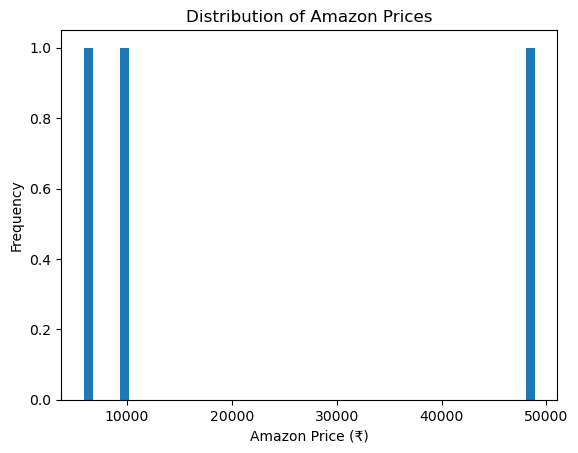

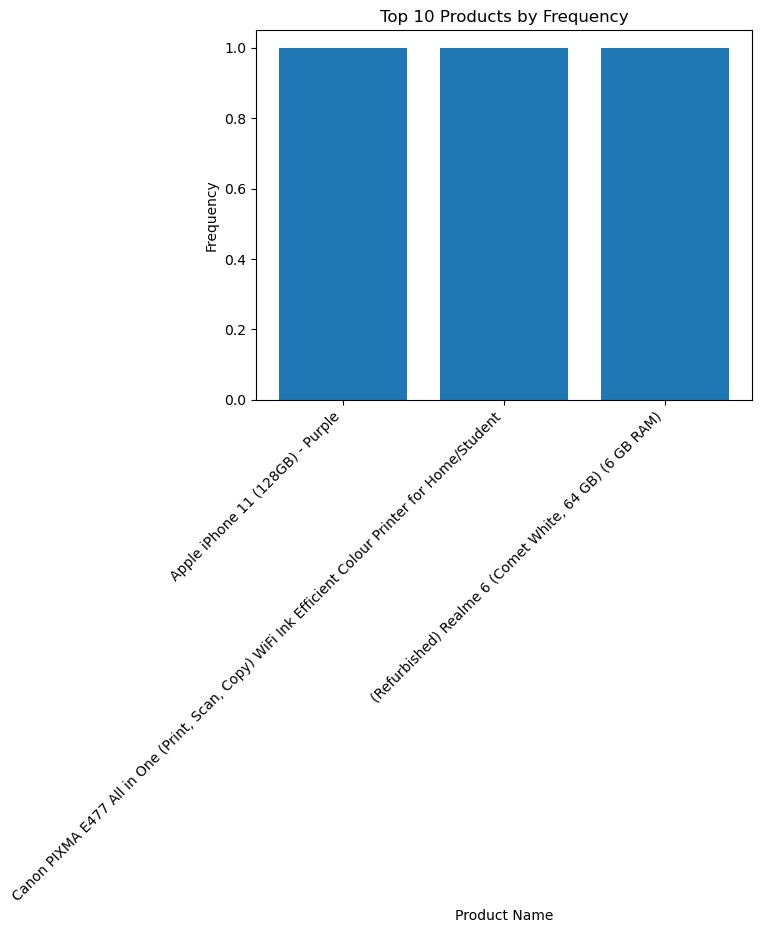

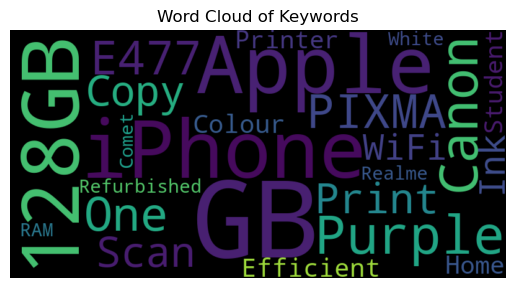

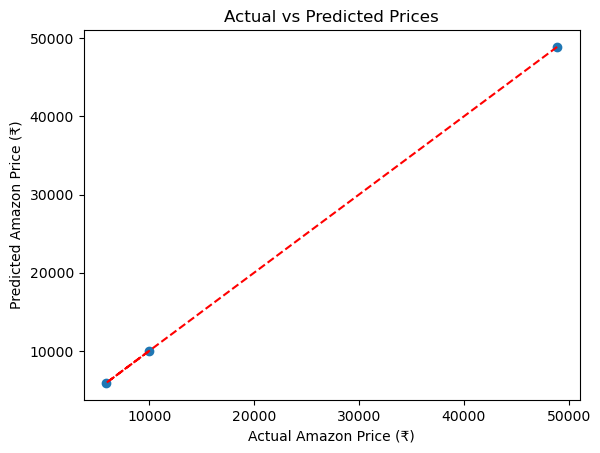

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load the dataset
df = pd.read_csv("product_prices.csv")

# Extract only Amazon name and Amazon price
amazon_df = df[["Amazon Name", "Amazon Price"]]

# Convert the Amazon name to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(amazon_df["Amazon Name"])
y = amazon_df["Amazon Price"]

# Create a linear regression model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X_tfidf, y)

# Make predictions on the entire dataset
y_pred = model.predict(X_tfidf)

# Data visualization
plt.hist(amazon_df["Amazon Price"], bins=50)
plt.xlabel("Amazon Price (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Amazon Prices")
plt.show()

product_freq = amazon_df["Amazon Name"].value_counts().head(10)
plt.bar(product_freq.index, product_freq.values)
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.title("Top 10 Products by Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

keywords = " ".join(amazon_df["Amazon Name"])
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(keywords)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Keywords")
plt.show()

plt.scatter(y, y_pred)
plt.xlabel("Actual Amazon Price (₹)")
plt.ylabel("Predicted Amazon Price (₹)")
plt.title("Actual vs Predicted Prices")

# Add regression line
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)
plt.plot(y, p(y), "r--")

plt.show()